In [ ]:
library(tidyverse)
library(scales)
library(zoo)


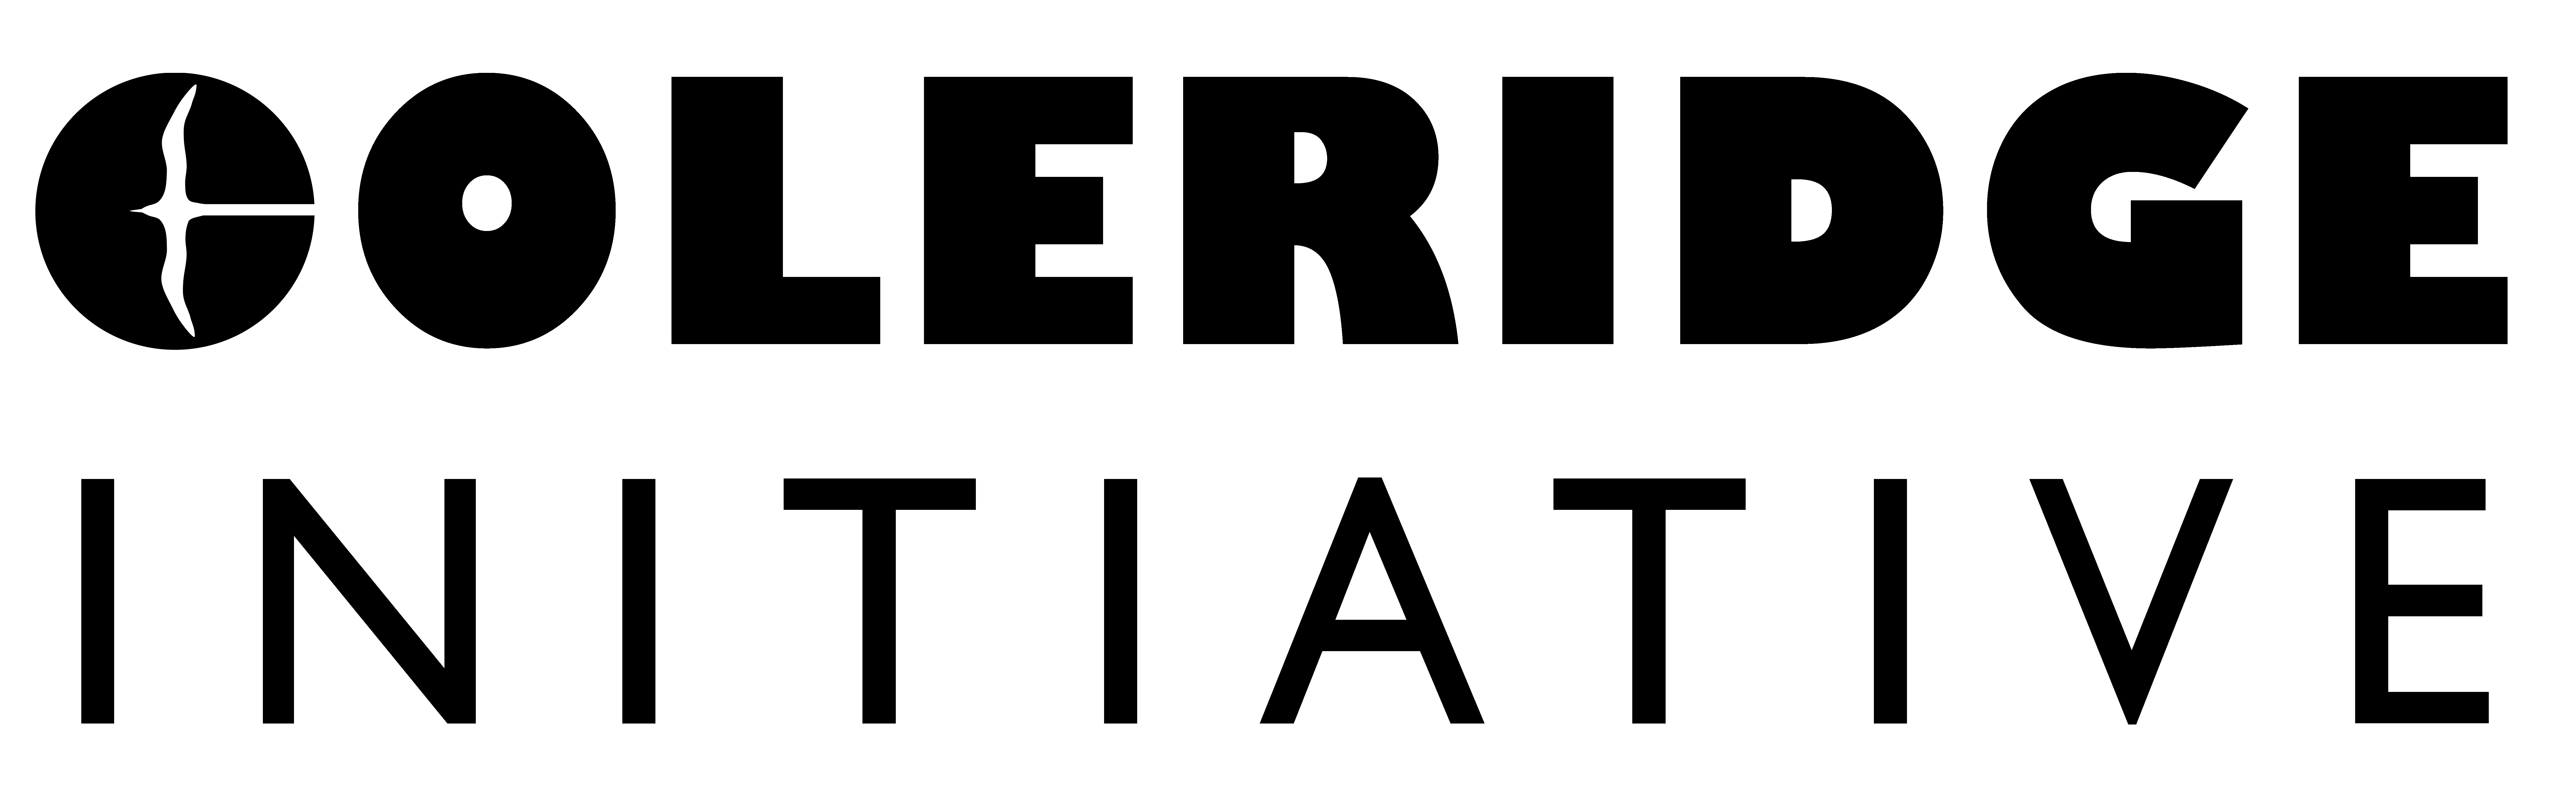

<center>
    <span style="font-size: 1.5em;">
        <a href='https://www.coleridgeinitiative.org'>Website</a>
    </span> 

<center><h1> Reviewing Export Files<h1></center>


# Expectations

At the conclusion of this training, you should be able to:

1. Navigating the export module inside the ADRF

1. Identifying necessary documentation based on the type of export request

1. Assessing files for primary, secondary, and complimentary disclosure

1. Reviewing code files

1. Communicating with end users about their export requests


# Motivation and Outline

In this presentation, we will provide examples of common export requests using fake data and show you how to evaluate them in accordance with dataset-specific rules. You can apply the techniques you learn here to the files you review.

1. Describing an export request
1. Accessing export requests
1. How to assess files for disclosure review
1. Walk-through examples 



# What is an export request?
An export request is when an ADRF user properly requests a file to be transfered outside the ADRF for future use. These files can be code files, graph outputs, tabular outputs, or a word document. Any type of file needs to be reviewed for disclosive information. Disclosive information is anything that will not pass your disclosure rules.

# What is needed in an export request?

1. Files for Export
    - The files you want outside of the ADRF.
1. Files for Export Documentation
    - These are the supporting files that contain the underlying counts, data, and code used to create the files for export.
1. Documentation Memo
    - This is generally a .txt or .doc file that contains detailed information about each file for export and its corresponding files for export documentation. 

# ADRF User Guide and Video Walk-Through
The user guide is a great reference for the export process or using the ADRF. 

<html>
  <head>
  </head>
  <body>
      <p>Check out the
      <a href="https://acrobat.adobe.com/link/track?uri=urn:aaid:scds:US:2c9eadca-1ed8-38f7-bb89-8ba373106a83" target="_blank rel="noopener noreferrer">ADRF User Guide</p>
  </body>
</html>
<br>

<p>Check out the
        <a href='https://youtu.be/qXG_i0v_bDQ'>Export Module Video Walk-through</a>
    </span> 
<html>
    <body>
        <p>Navigate to the
            <a href = "https://adrf.okta.com"
               targer="_blank rl = "noopener noreferrer">ADRF</p>

# How to review files?
1. Look at what is included in the export, is there anything missing?
    - Evaluate the documentation memo
        - Do the export files have the appropriate supporting files?
        - Is the researcher describing their cohort and output tables correctly?
        - If missing supporting files, documentation files, or export files then send the export request back to the researcher.
2. Look at files and underlying counts.
    - Check the underlying counts, do they pass disclosure review?
    - How are the statistics created? Are the underlying counts 10 or greater?
        - Fuzzy percentiles, means, sums, etc...
    - Is there a code file present? Is it free from references of data?
3. Complimentary disclosure
    - Are any of the export files created from the same cohort? Or, created from multiple subsets?
        - If so, need to assess for complimentary disclosure. 


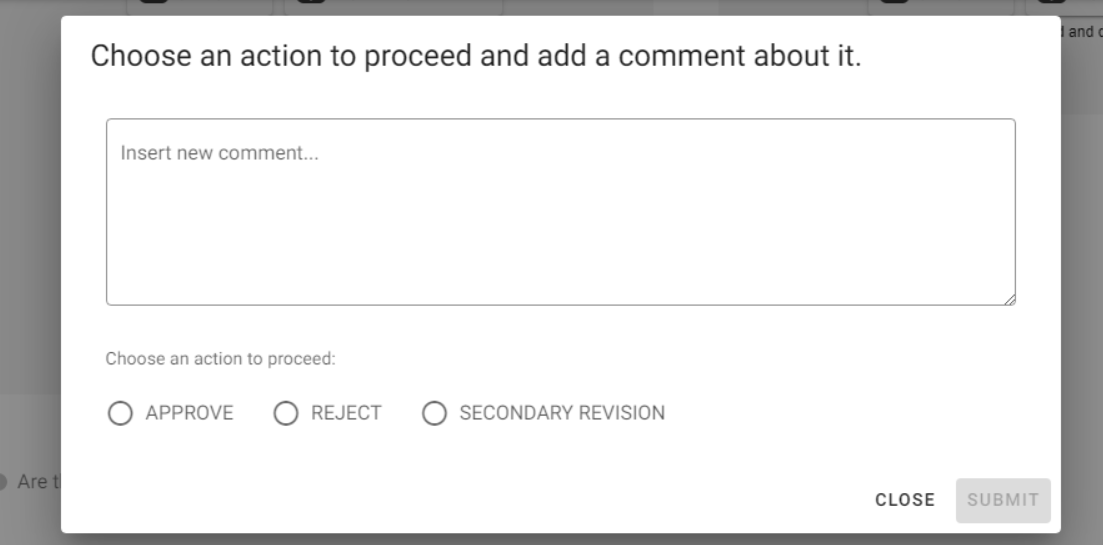

# Understanding complimentary disclosure


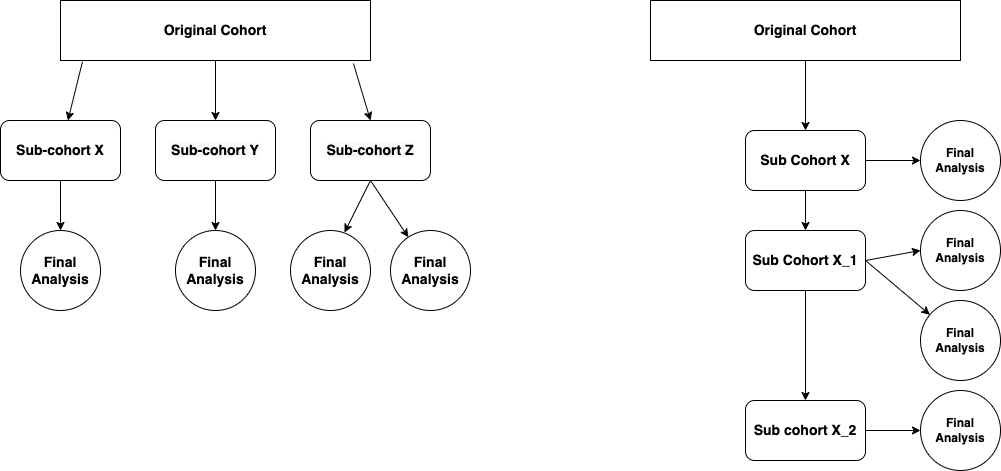

# Define the Rules
- General rules: No cell should have fewer than 10 observations unless otherwise designated. Always report the total number of observations.
    - Aggregation: If a table contains sensitive cells (i.e. fewer than 10 observations), users can aggregate (collapse) those categories. 
- Suppression: When sensitive cells still occur and no further grouping is appropriate, the procedure is to suppress the cell (remove its value), and then suppress other cells to stop the first cell from being determined, also known as secondary suppression.
    - Secondary suppression: secondary suppression is the suppression of other cells or marginal totals in the table so that the suppressed cell(s) cannot be recalculated. 
- Industry level information presented for any geographic area must be redacted if a single employer makes up more than 80% of the employment for that industrial sector or less than 3 establishments. 

# Define the Rules
- Percentages: Report the number for both the numerator and denominator. Output needs to be suppressed where either, or both, of the counts used to calculate the percentage, proportion, or ratio have been suppressed. Round percentages calculated from unweighted counts to 1 decimal place. Do not report 0 or 100%.
- Percentiles: Do not report exact percentiles. Users can calculate a fuzzy median by averaging the true 45 and 55 percentiles. This logic can be used when calculating any percentile. 
- Maxima and Minima: Suppress maximum and minimum values in general. Top-coded values may be considered for release. 
- Cell values: round all reported values to the nearest sensible units.
- Weighted Data: Report both unweighted and weighted counts.

# Export Example 1

In [ ]:
avg_yearly_wage <- data.frame(avg_wage = c(39029, 40257, 56987, 75908, 89032),
                              year = c(2015, 2016, 2017, 2018, 2019),
                                          count_ssn = c(767, 890, 543, 987, 231))


# We want to export this table:
- Documentation memo:
    - export_1.csv
        - Average yearly wages for individuals their first year after exiting TANF.
        - export_1_data.csv
        - exports.ipynb

In [ ]:
avg_yearly_wage %>% select(avg_wage, year) %>% write_csv("figures_for_export/export_1.csv")
avg_yearly_wage %>% select(avg_wage, year)

# We need to see proof of the underlying counts:

In [ ]:
avg_yearly_wage %>% write_csv("supporting_data/export_1_data.csv")
avg_yearly_wage

We can release this table because all counts are greater than or equal to 10.

# Export Example 2

In [ ]:
count_of_genders <- data.frame(gender = c("M", "F", "Total"),
                avg_wage = c(3500, 2500, 3000),
               count_ssn = c(10,5,15))


# We want to export this figure:
- Documentation memo:
    - export_2.png
        - Counts of genders for those that exited TANF between the years 2015 and 2019.
        - export_2_data.csv
        - exports.ipynb

In [ ]:
ggplot(data=count_of_genders, aes(x=gender, y=avg_wage)) +
    geom_bar(stat="identity") 
#ggsave("figures_for_export/export_2.png")

# We need to show the underlying counts:

In [ ]:
count_of_genders %>% write_csv("supporting_data/export_2_data.csv")
count_of_genders

This graph cannot be released. For this to pass disclosure review, we need to redact the average wage for the values `F` and `Total` or redact the values `M` and `F`.

# Export Example 3

In [ ]:
median <- data.frame(gender = c("M", "F", "M", "F", "M", "F", "M", "F", "M", "F"),
                    ethnicity = c('Hispanic','Native Hawaiian', 'Asian', 'White', 'Black'),
                    median_qtr_wage = c(4567, 9860, 9043, 8954, 2134, 124, 4598, 3486, 854, 3904),
                    fuzzy_median_qtr_wage = c(4530, 9850, 9056, 8967, 2109, 109, 4587, 3499, 849, 3911),
                    n_counts = c(98, 45, 94, 42, 89, 9, 204, 984, 2, 485))
median

# We want to export this figure:
- Documentation memo:
    - export_3.png
        - The fuzzy median wage for ethnicity broken down by gender. The column `n` is the total distinct count of people in our cohort.
        - export_3_data.csv
        - exports.ipynb

In [ ]:
ggplot(data=median, aes(x=ethnicity, y=fuzzy_median_qtr_wage, fill=gender)) + 
  geom_bar(position='dodge', stat='identity')
#ggsave("figures_for_export/export_3.png")

# We need to show the underlying counts:

In [ ]:
median %>% arrange(ethnicity) %>% write_csv("supporting_data/export_3_data.csv")
median %>% arrange(ethnicity)

As it currently is, this graph will not pass disclosure review. We need to redact the values for Hispanic female and White male.

# Export Example 4

In [ ]:
ethnicity_data <- data.frame(ethnicity = c('Hispanic','Native Hawaiian', 'Asian', 'White', 'Black', 'total_avg'),
               avg_qtr_wage = c(3287, 4098, 1094, 3068, 3398, 2824),
               count_ssn = c(10, 59, 109, 32, 11, 230))


# We want to export this figure:
- Documentation memo:
    - export_4.png
        - Average quarterly wage broken down by ethnicity.
        - export_4_data.csv
        - exports.ipynb

In [ ]:
ggplot(data=ethnicity_data, aes(x=ethnicity, y=avg_qtr_wage)) +
    geom_bar(stat="identity") 
#ggsave("figures_for_export/export_4.png")

# We need to show the underlying counts:

In [ ]:
ethnicity_counts <- data.frame(ethnicity = c('Hispanic','Native Hawaiian', 'Asian', 'White', 'Black', 'other', 'total_avg'),
               fuzzy_median_wage = c(3287, 4098, 1094, 3068, 3398, 2001, 2824),
               count_ssn = c(10, 59, 109, 32, 11, 9, 230))
ethnicity_counts %>% write_csv("supporting_data/export_4_data.csv")
ethnicity_counts

This graph will not pass disclosure review. The graph does not contain the fuzzy median wage value for the ethnicity category `other`. However, it does contain the total average for every ethnicity category, so we need to redact the `total_avg` median wage value.

# Export Example 5


In [ ]:
over_time <- data.frame(year_qtr = c("2018 Q1", "2018 Q2", "2018 Q3", "2018 Q4", "2019 Q1"),
                       count_ssn = c(22, 56, 75, 80, 102))


# We want to export this figure:
- Documentation memo:
    - export_5.png
        - A cumulative count of individuals that ever earned a living wage from 2018 quarter 1 to 2019 quarter 1.
        - export_5_data.csv
        - exports.ipynb

In [ ]:
ggplot(data=over_time, aes(x=year_qtr, y=count_ssn, group=1)) +
  geom_line() +
    geom_point() +
    labs(title="Cumulative Count of those that ever earned a living wage",
        x ="Year and Quarter", y = "Count of SSN")
#ggsave("figures_for_export/export_5.png")

# We need to show the underlying counts:

In [ ]:
over_time %>% write_csv("supporting_data/export_5_data.csv")
over_time

This graph will not pass disclosure review. Since this graph is representing a cumulative count, we need to focus on the differences between the quarters. Between quarters 3 and 4 in 2018 there is a difference of 5.

# Export Example 6

In [ ]:
set.seed(109)
age_total <- data.frame(age_group = c("18-30", "31-40", "41-50", "51-60", "61+"),
                  gender = rep(c("M", "F"), each=5),
                  #ethnicity = c('Hispanic','Native Hawaiian', 'Asian', 'White', 'Black'),
                 avg_qtr_wage = sample(989:10000, 10, replace=TRUE),
                 total_n = sample(50:1000, 10))



set.seed(109)
age_degree <- data.frame(age_group = c("18-30", "31-40", "41-50", "51-60", "61+"),
                  gender = rep(c("M", "F"), each=5),
                  #ethnicity = c('Hispanic','Native Hawaiian', 'Asian', 'White', 'Black'),
                 avg_qtr_wage = sample(500:2000, 10, replace=TRUE),
                  degree = c("Associates"),
                 n = sample(1:50, 10))



# We want to export this figure:
- Documentation memo:
    - export_6.png
        - Plotting the average quarterly wage by age group and gender. This export uses the same subset as export_7.png and export_8.png.
        - export_6_data.csv
        - exports.ipynb

In [ ]:
d <- age_total %>% mutate(total_n = total_n - 2)
ggplot(data = d, aes(x = age_group, y = avg_qtr_wage, fill=gender)) +
    geom_bar(stat="identity", position = 'dodge') +
    labs(title = "On average females in the 41-50 age group\n make $7858.00 less than their male counterparts")
#ggsave("figures_for_export/export_6.png")

# We need to show the underlying counts:

In [ ]:
d %>% write_csv("supporting_data/export_6_data.csv")
d

This graph will not pass review. The title of the graph contains disclosive information. Is this a sensible unit to round to?

# Export Example 7

# We want to export this figure:
- Documentation memo:
    - export_7.png
        - Average wages broken down by gender. This export uses the same subset as export_6.png and export_8.png.
        - export_7_data.csv
        - exports.ipynb

In [ ]:
ggplot(data = age_degree, aes(x = gender, y = avg_qtr_wage, fill = age_group)) +
    geom_bar(stat="identity", position = 'dodge') +
    labs(title="Females make more than males")
#ggsave("figures_for_export/export_7.png")

# We need to show the underlying counts:

In [ ]:
age_degree %>% write_csv("supporting_data/export_7_data.csv")
age_degree

This graph will not pass disclosure review. The value for males in the age group 51-60 needs to be redacted.

# Export Example 8

# We want to export this figure:
- Documentation memo:
    - export_8.csv
        - the count of gender by age group. The total_n_by_age_gender is the unique count of individuals in this sample. This export uses the same subset as export_6.png and export_7.png.
        - export_8_data.csv
        - exports.ipynb

In [ ]:
age_total %>% group_by(age_group) %>% summarize(total_n_by_age_gender = sum(total_n)) #%>% write_csv("supporting_data/export_8.csv")


This export will not pass disclosure review because the total count for gender by age group contains more observations than the wages by age and gender bar plot. There is a fundamental issue with the cohort that the researcher needs to address. 

# Next Steps
- At this point we have files that will pass disclosure and files that will not pass disclosure. We will reject this export request and list all the disclosure issues and send to the researcher. They will correct the issues and resubmit the export.

# Final Notes and General Rules
- If you reject an export, let Coleridge know because the export will come back to us. We will also need to reject it.
- Keep in mind the disclosure unit of interest. In most cases it will be the SSN value.
- If a researcher submits multiple requests within a the same time frame, reject the exports and have the researcher submit all files as 1 export. This makes it easier to assess for complimentary disclosure. 
- When reviewing code, make sure the code does not contain references to data or statistical results. 
- If you have any questions, please reach out.


In [ ]:
# jupyter nbconvert export_training.ipynb --to slides --post serve --no-input
